## Bike rental prediction



In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#read the data
bikes = pd.read_csv('day.csv')
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Here are the descriptions for the relevant columns:

**instant** - A unique sequential ID number for each row

**dteday** - The date of the rentals

**season** - The season in which the rentals occurred

**yr** - The year the rentals occurred

**mnth** - The month the rentals occurred

**holiday** - Whether or not the day was a holiday

**weekday** - The day of the week (as a number, 0 to 7)

**workingday** - Whether or not the day was a working day

**weathersit** - The weather (as a categorical variable)

**temp** - The temperature, on a 0-1 scale

**atemp** - The adjusted temperature

**hum** - The humidity, on a 0-1 scale

**windspeed** - The wind speed, on a 0-1 scale

**casual** - The number of casual riders (people who hadn't previously signed up with the bike sharing program)

**registered** - The number of registered riders (people who had already signed up)

**cnt** - The total number of bike rentals (casual + registered)

In [3]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


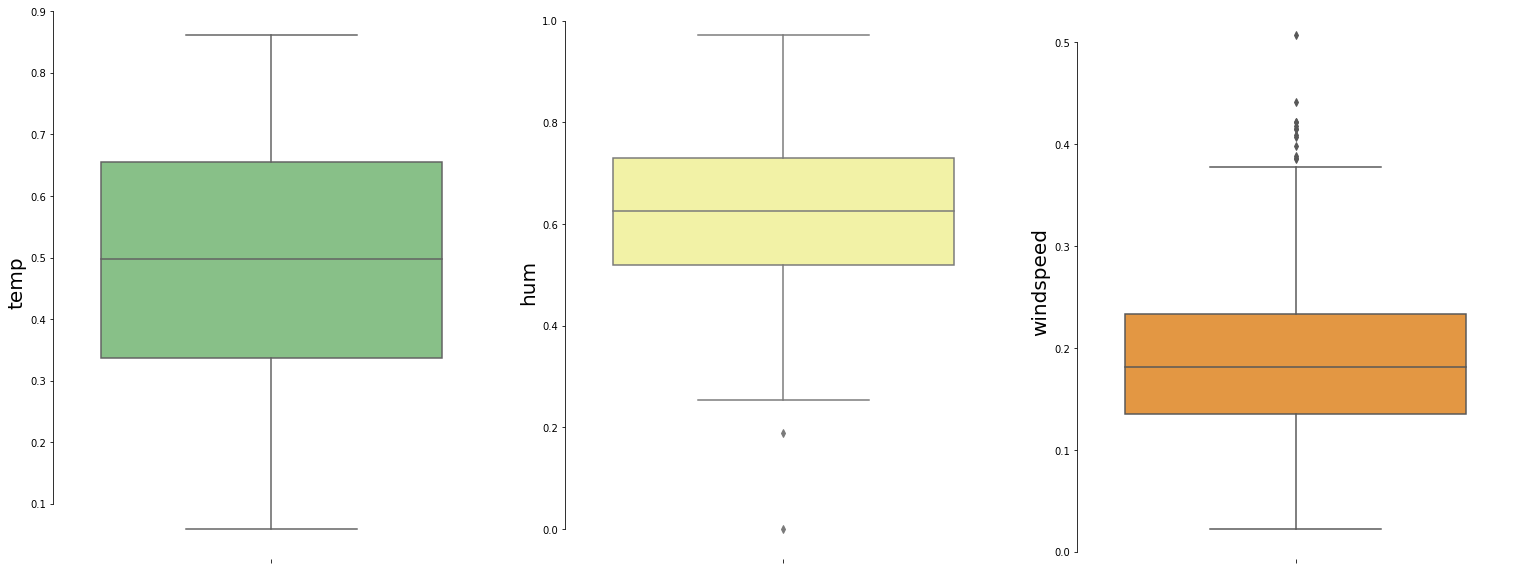

In [5]:
fig = plt.figure(figsize=(26,10))
pal = ['Accent','Accent_r','YlOrBr']
for i, f in enumerate(['temp','hum','windspeed']):
    fig.add_subplot(1,3,i+1)
    plt.ylabel(f, fontsize=20)
    sns.boxplot(y=f, data=bikes, palette=pal[i])
    sns.despine(trim=True, offset=5)

In [6]:
#From the summary table, we can get the inner quartile range for the 'temp', 'hum', 'windspeed' columns
#We use turkey's method to remove outliers
for i in ['hum', 'windspeed']:
    p25, p75 = np.percentile(bikes[i], [25,75])
    iqr = p75-p25
    max = p75 + 1.5*iqr
    min = p25 - 1.5*iqr
    bikes = bikes.drop(bikes[bikes[i]>max].index, axis=0)
    bikes = bikes.drop(bikes[bikes[i]<min].index, axis=0)


C:\Users\Pranab\Miniconda3\envs\datascience\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


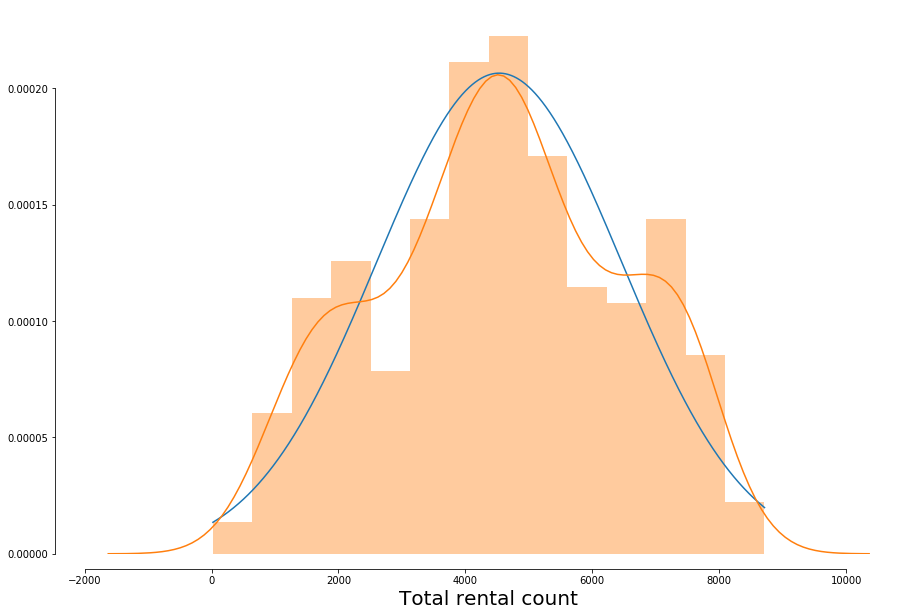

In [7]:
# KDE and PDF of target variable
plt.figure(figsize=(15,10))

from scipy.stats import norm
x = np.linspace(22,8714,8000)
y = norm.pdf(x, loc = np.mean(bikes['cnt']), scale = np.std(bikes['cnt']))
plt.plot(x,y)

ax = sns.distplot(bikes['cnt'], hist=True)
ax.set_xlabel('Total rental count', fontsize=20)
sns.despine(trim=True, offset=15)

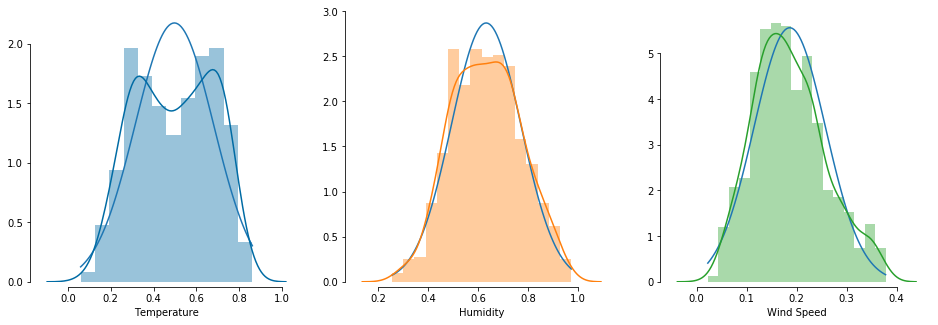

In [8]:
# KDE and PDF plot of the continuous predictor variables

fig = plt.figure(figsize=(16,5))
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
cb_green = (40/255, 160/255, 44/255)
pal = [cb_dark_blue,cb_orange,cb_green]
labels = ['Temperature', 'Humidity', 'Wind Speed']
for i, f in enumerate(['temp','hum','windspeed']):
    fig.add_subplot(1,3,i+1)
    
    x = np.linspace(np.min(bikes[f]), np.max(bikes[f]), 100)
    y = norm.pdf(x, loc=np.mean(bikes[f]), scale=np.std(bikes[f]))
    plt.plot(x,y)
    
    ax = sns.distplot(bikes[f], color=pal[i])
    sns.despine(trim=True, offset=5)
    ax.set_xlabel(labels[i])

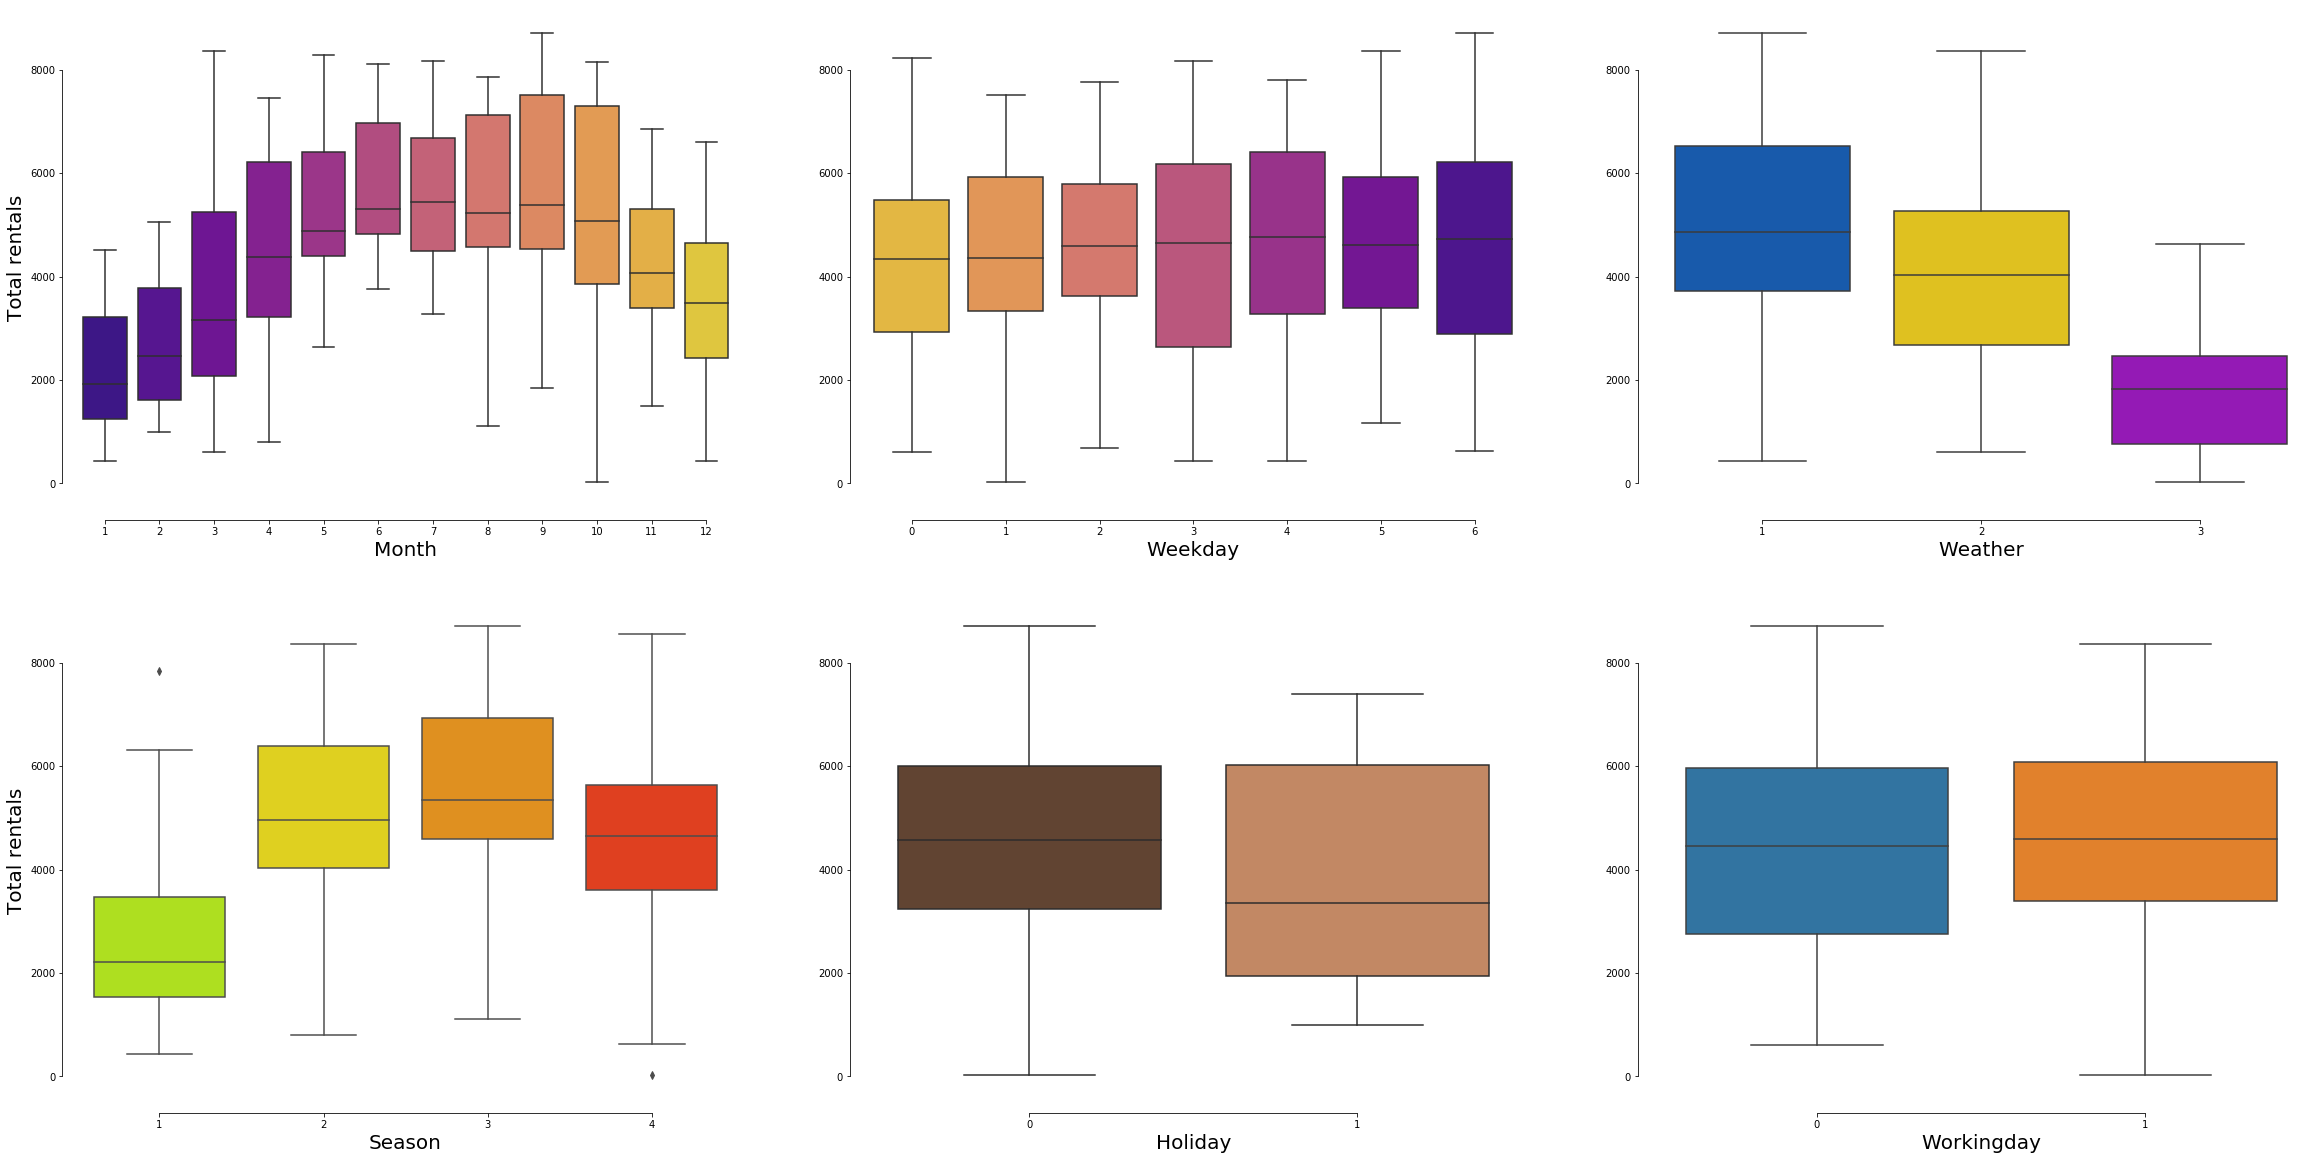

In [9]:
# bocplots for the categorical predictor variables

fig = plt.figure(figsize=(40,20))
pal = ['plasma','plasma_r','prism', 'prism_r', 'copper', 'tab10']
xlabels = ['Month', 'Weekday', 'Weather', 'Season', 'Holiday', 'Workingday']
for i, f in enumerate(['mnth','weekday','weathersit', 'season', 'holiday', 'workingday']):
    fig.add_subplot(2,3,i+1)
    ax = sns.boxplot(x=f, y='cnt', data=bikes, palette=pal[i])
    plt.xlabel(xlabels[i], fontsize=20)
    if i==0 or i==3:
        ax.set_ylabel('Total rentals', fontsize=20)
    else:
        ax.set_ylabel('')
    sns.despine(trim=True, offset=15)

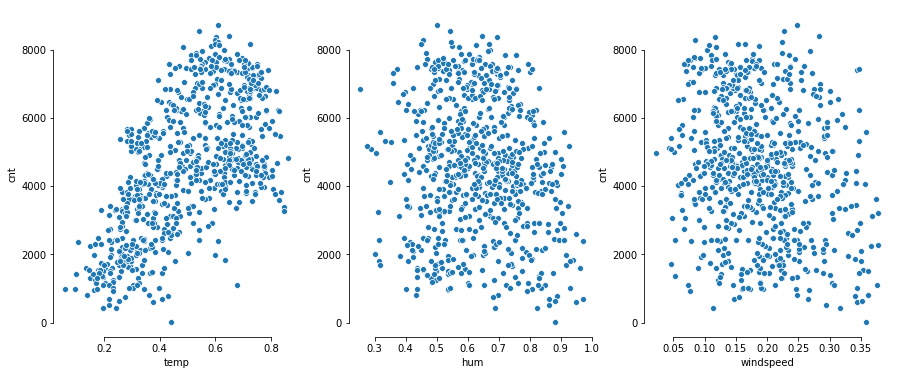

In [19]:
# plotting scatter plots for the continuous variables vs the target variable
fig = plt.figure(figsize=(15,6))

for i,f in enumerate(['temp','hum','windspeed']):
    fig.add_subplot(1,3,i+1)
    ax = sns.scatterplot(f, 'cnt', data=bikes)
    sns.despine(trim=True)

In [20]:
cont_vars = ['temp', 'hum', 'windspeed','cnt']

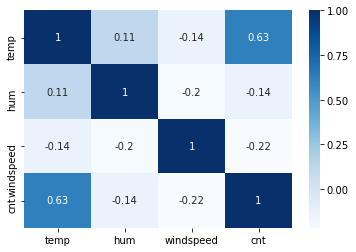

In [21]:
fig4 = plt.figure(figsize=(6,4))
sns.heatmap(bikes[cont_vars].corr(), cmap='Blues', annot=True)
plt.show()

In [22]:
# creating dummy variables
for value in ['mnth','weekday','weathersit','season']:
    temp = pd.get_dummies(bikes[value], prefix = value)
    bikes = pd.concat([bikes, temp], axis=1)
    del bikes[value]
bikes

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,season_1,season_2,season_3,season_4
0,1,2011-01-01,0,0,0,0.344167,0.363625,0.805833,0.160446,331,...,0,0,1,0,1,0,1,0,0,0
1,2,2011-01-02,0,0,0,0.363478,0.353739,0.696087,0.248539,131,...,0,0,0,0,1,0,1,0,0,0
2,3,2011-01-03,0,0,1,0.196364,0.189405,0.437273,0.248309,120,...,0,0,0,1,0,0,1,0,0,0
3,4,2011-01-04,0,0,1,0.200000,0.212122,0.590435,0.160296,108,...,0,0,0,1,0,0,1,0,0,0
4,5,2011-01-05,0,0,1,0.226957,0.229270,0.436957,0.186900,82,...,0,0,0,1,0,0,1,0,0,0
5,6,2011-01-06,0,0,1,0.204348,0.233209,0.518261,0.089565,88,...,1,0,0,1,0,0,1,0,0,0
6,7,2011-01-07,0,0,1,0.196522,0.208839,0.498696,0.168726,148,...,0,1,0,0,1,0,1,0,0,0
7,8,2011-01-08,0,0,0,0.165000,0.162254,0.535833,0.266804,68,...,0,0,1,0,1,0,1,0,0,0
8,9,2011-01-09,0,0,0,0.138333,0.116175,0.434167,0.361950,54,...,0,0,0,1,0,0,1,0,0,0
9,10,2011-01-10,0,0,1,0.150833,0.150888,0.482917,0.223267,41,...,0,0,0,1,0,0,1,0,0,0


In [23]:

cat_vars = ['yr', 'holiday', 'workingday','mnth_1', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_1',
       'weathersit_2', 'weathersit_3', 'season_1', 'season_2', 'season_3',
       'season_4']

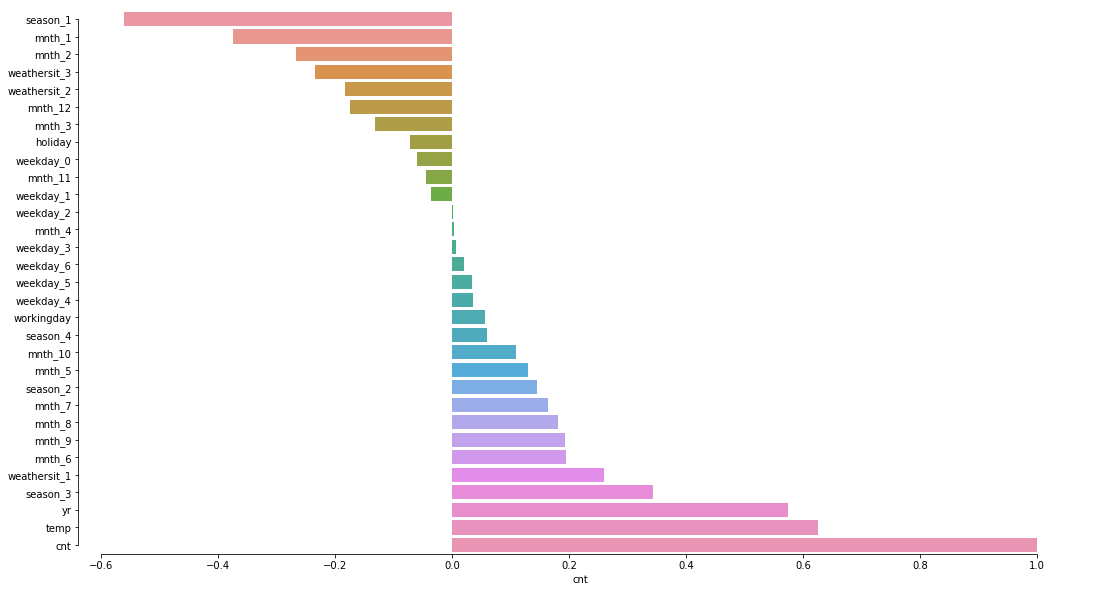

In [24]:
#correlation with target
plt.figure(figsize=(18,10))
sns.barplot(bikes[cat_vars+ ['cnt', 'temp']].corr()['cnt'].sort_values(), bikes[cat_vars+ ['cnt','temp']].corr()['cnt'].sort_values().index)
sns.despine(trim=True)

In [26]:
# getting features with correlation coefficient magnitude > 0.25
g = bikes[cat_vars+ ['cnt', 'temp']].corr()['cnt']
g_fea = list(g[g>0.25].index) + list(g[g<-0.25].index)
g_fea

['yr',
 'weathersit_1',
 'season_3',
 'cnt',
 'temp',
 'mnth_1',
 'mnth_2',
 'season_1']

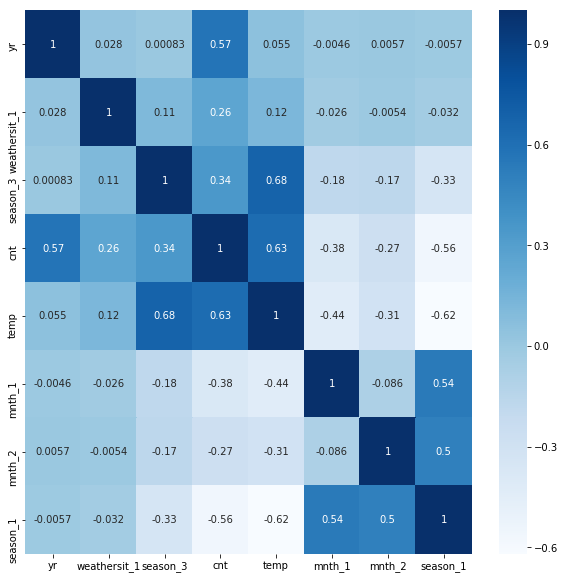

In [27]:
#Correlation heatmap
fig4 = plt.figure(figsize=(10,10))
sns.heatmap(bikes[g_fea].corr(), cmap='Blues', annot=True)
plt.show()

In [30]:
fea_2 = ['yr', 'temp','weathersit_1','season_1']

In [31]:
train = bikes.sample(frac=0.75, axis=0)
test = bikes.drop(train.index, axis=0)

from statsmodels.api import OLS
OLS(train['cnt'], train[fea_2]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     3320.
Date:                Sun, 21 Apr 2019   Prob (F-statistic):               0.00
Time:                        10:42:07   Log-Likelihood:                -4467.2
No. Observations:                 538   AIC:                             8942.
Df Residuals:                     534   BIC:                             8960.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
yr            2196.2041     83.856     26.190      0.000    2031.477    2360.931
temp          6149.0904    140.821     43.666      0.000    5872.460    6425.721
weathersit_1   834.4780     86.211      9.679      0.000     665.123    1003.833
season_1      -768.8468     96.103     -8.000      0.000    -957.634    -580.060
==============================================================================
Omnibus:                       84.023   Durbin-Watson:                   2.204
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.707
Skew:                          -0.866   Prob(JB):                     1.91e-38
Kurtosis:                       5.179   Cond. No.                         4.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
train = bikes.sample(frac=0.75, axis=0)
test = bikes.drop(train.index, axis=0)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train[fea_2], train['cnt'])
predictions = lr.predict(test[fea_2])

from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(test['cnt'], predictions)**0.5
print(RMSE)

959.6690398654074


In [33]:
train = bikes.sample(frac=0.75, axis=0)
test = bikes.drop(train.index, axis=0)

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(train[fea_2], train['cnt'])
predictions = rfr.predict(test[fea_2])

from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(test['cnt'], predictions)**0.5
print(RMSE)

853.2080484841264


C:\Users\Pranab\Miniconda3\envs\datascience\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [34]:
train = bikes.sample(frac=0.75, axis=0)
test = bikes.drop(train.index, axis=0)

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(train[fea_2], train['cnt'])
predictions = gbr.predict(test[fea_2])

from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(test['cnt'], predictions)**0.5
print(RMSE)

802.3568555959515
